# Predicting weight of a person using their height

#### MUHAMMED RIZWAN P. S., CODEVITA INTERNSHIP - DATA SCIENCE

SUBMITTED ON: 31/07/2022

TASK: To predict weight of a person based on their height using Linear Regression(Supervised ML).

Linear regression quantifies the relationship between one or more predictor variable(s) and one outcome variable. Linear regression is commonly used for predictive analysis and modeling. For example, it can be used to quantify the relative impacts of age, gender, and diet (the predictor variables) on height (the outcome variable).

Linear Regression can be considered a Machine Learning algorithm that allows us to map numeric inputs to numeric outputs, fitting a line into the data points. Linear Regression as an algorithm relies on the concept of lowering the cost to maximize the performance.

Note: Make sure to open the directory in the jupiter notebook page. And in this directory, create a python3 notebook.

Step 1: Install(if required) and import all the required libraries.

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

Step 2: Import the dataset and review.

For more details about read_csv() method: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [2]:
# The read_csv() function is used to retrieve data from csv file.
dataset = pd.read_csv("weight-height.csv")
dataset

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


Step 3: Analyzing data.

In [3]:
# The info() method shows details of columns, column type and number of columns.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


Step 4: Calculate Generate descriptive statistics.

In [4]:
# Calculating count, mean and other descriptors for numerical columns
dataset.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [5]:
# Checking for null values: list of number of null values in each column
dataset.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

Step 3: Selecting X and Y for input and output variables and converting them to Array for easier calculation before using ML model

In [6]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 2].values

Step 4: Convert Gender to number: Convert all categorical values (text values) to numerical , in this case convert gender variable to 0 for male and 1 for female.

LabelEncoder is used for this purpose.

In [7]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_gender = LabelEncoder()
X[:, 0] = LabelEncoder_gender.fit_transform(X[:, 0])

import numpy as np
X = np.vstack(X[:, :]).astype(np.float)

C:\Users\thepr\AppData\Local\Temp\ipykernel_18340\109235105.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.vstack(X[:, :]).astype(np.float)


In [8]:
X[:3]

array([[ 1.        , 73.84701702],
       [ 1.        , 68.78190405],
       [ 1.        , 74.11010539]])

Step 4: After dataset is prepared, split dataset into training set and test set We will use 80% of the data for training and 20% of the data for testing.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Step 5: Fit Regression Model Using LinearRegression to train our model.

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

Step 6: Predict test set values.

In [11]:
lrpred = lr.predict(X_test)

Compare the predicted values (lin_pred) with the actual values (y_test). We can see that our model did a fairly good job.

In [12]:
lrpred[:10]

array([141.93828842, 176.55658781, 219.77836195, 148.83188401,
       162.0920759 , 105.84706638, 142.40537439, 134.34505435,
       184.01021005, 196.05450515])

In [13]:
Y_test[:10]

array([138.0857961 , 187.36336585, 216.53319128, 131.76144282,
       157.71843843,  98.51607861, 149.63194856, 133.515492  ,
       188.05333309, 210.1988449 ])

Step 7: Model Evaluation.

In [14]:
from sklearn import metrics
print("R Square = ", metrics.r2_score(Y_test, lrpred))
print("Mean Squared Error = ", metrics.mean_squared_error(Y_test, lrpred))
print("Mean Absolute Error = ", metrics.mean_absolute_error(Y_test, lrpred))

R Square =  0.9052889824534557
Mean Squared Error =  97.87152220196165
Mean Absolute Error =  7.955916525326746


In [15]:
# Predicting weight using height and calculating health status.
h = 67
my_pred_weight = lr.predict([[0, h]])
print('My predicted weight = ', my_pred_weight)
bmi = (my_pred_weight * 0.4535) / (h * 0.0254 * h * 0.0254)
if bmi < 18.5:
    print("You are underweight!")
elif bmi >= 18.5 and bmi < 24.9:
    print("You are healthy!")
elif bmi>=24.9 and bmi < 29.9:
    print("You are overweight!")
else:
    print("You are obese!")

My predicted weight =  [155.50992349]
You are healthy!


### Visualising the data

In [16]:
from matplotlib import pyplot as plt
import numpy as np

# Preparing X and Y from the given data
df = pd.read_csv("weight-height.csv")
dt = df.to_numpy()

X = dt[1:, 1].astype("float64")
Y = dt[1:, 2].astype("float")

In [17]:
X[:5]

array([68.78190405, 74.11010539, 71.7309784 , 69.88179586, 67.25301569])

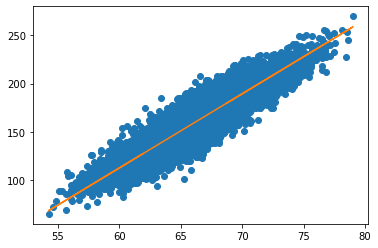

In [18]:
m, b = np.polyfit(X, Y, 1)
plt.plot(X, Y, 'o')

# Create a scattered plot
plt.plot(X, m*X + b)